In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [2]:
employee=pd.read_csv("Employee Attrition - Decision tree.csv")

In [3]:
employee.shape

(15787, 10)

In [4]:
employee.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [5]:
employee.dtypes

Emp ID                   float64
satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
promotion_last_5years    float64
dept                      object
salary                    object
dtype: object

In [6]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


In [7]:
employee.isnull().sum()

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

In [8]:
employee['promotion_last_5years'].unique()

array([ 0.,  1., nan])

In [9]:
pd.options.display.max_rows=15787

In [10]:
employee.dropna(inplace=True)

In [11]:
employee.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [12]:
employee['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [13]:
employee['dept'].nunique()

10

In [14]:
employee['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [15]:
employee.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [16]:
employee.drop('Emp ID',axis=1,inplace=True)

<Axes: xlabel='salary', ylabel='number_project'>

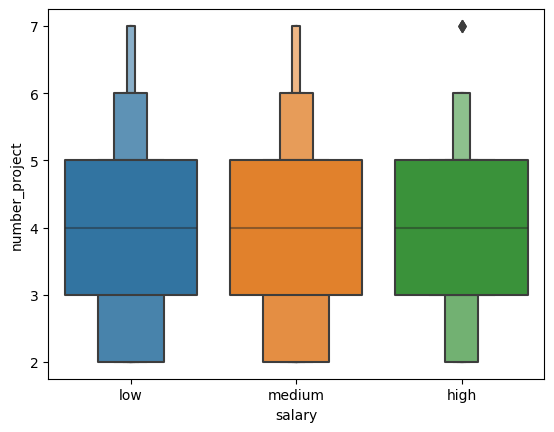

In [17]:
sns.boxenplot(x=employee['salary'],y=employee['number_project'])

<Axes: xlabel='number_project', ylabel='Count'>

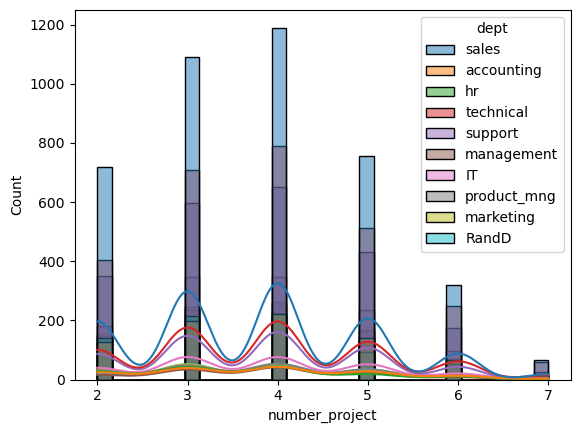

In [18]:
sns.histplot(x=employee['number_project'],hue=employee['dept'],kde=True)

<Axes: xlabel='promotion_last_5years', ylabel='number_project'>

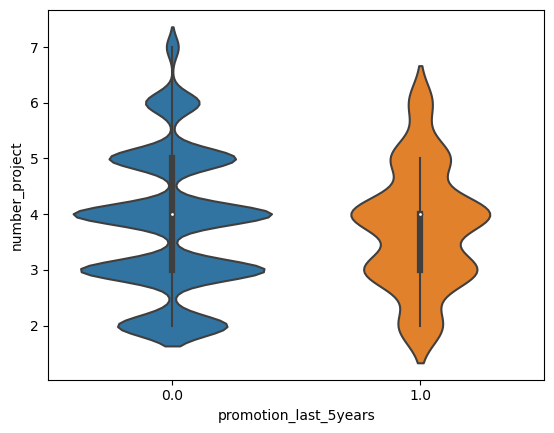

In [19]:
sns.violinplot(y=employee['number_project'],x=employee['promotion_last_5years'])

<Axes: xlabel='dept', ylabel='count'>

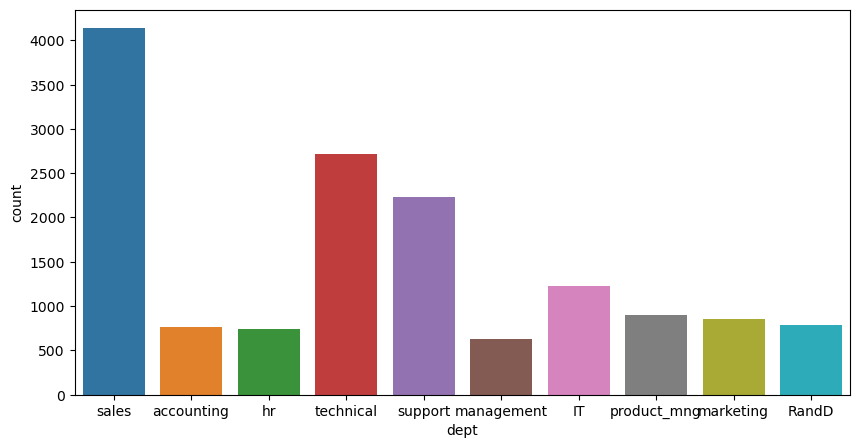

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x=employee['dept'])

<Axes: xlabel='satisfaction_level', ylabel='Count'>

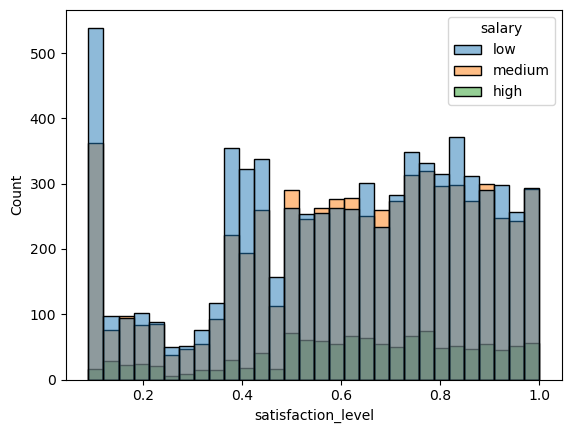

In [21]:
sns.histplot(x=employee['satisfaction_level'],hue=employee['salary'])

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [23]:
employee['dept']=encoder.fit_transform(employee['dept'])
employee['salary']=encoder.fit_transform(employee['salary'])



In [24]:
employee.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [25]:
employee.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,7,1
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,7,2
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,7,2
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,7,1


In [26]:
x=employee.drop('salary',axis=1)

In [27]:
y=employee['salary']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11999, 8)
(3000, 8)
(11999,)
(3000,)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
deci=DecisionTreeClassifier()
deci.fit(X_train,y_train)
print(f'''score{deci.score(X_train,y_train)}''')
y_pred=deci.predict(X_test)
Acu=accuracy_score(y_test,y_pred)
print("Accuracy:",Acu)

score0.9994166180515043
Accuracy: 0.6006666666666667


In [34]:
actual_value=y_test
prediction=y_pred
print("Actual Value:",actual_value[:5])
print("Predicted Value",prediction[:5])

Actual Value: 5156     1
10502    1
3846     2
6730     1
15647    2
Name: salary, dtype: int32
Predicted Value [1 2 1 1 2]


Text(0.5, 1.0, 'Actual Value Vs Predicted Value')

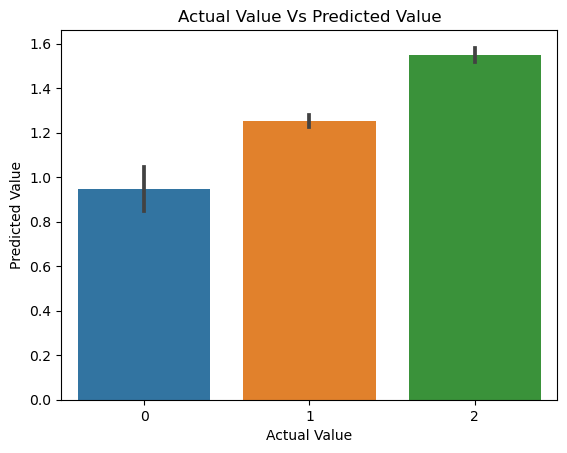

In [35]:
sns.barplot(x=actual_value,y=prediction)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value Vs Predicted Value")

In [36]:
cnc=confusion_matrix(y_test,y_pred)
cnc

array([[ 85,  83,  72],
       [ 81, 938, 453],
       [ 70, 439, 779]], dtype=int64)

<Axes: >

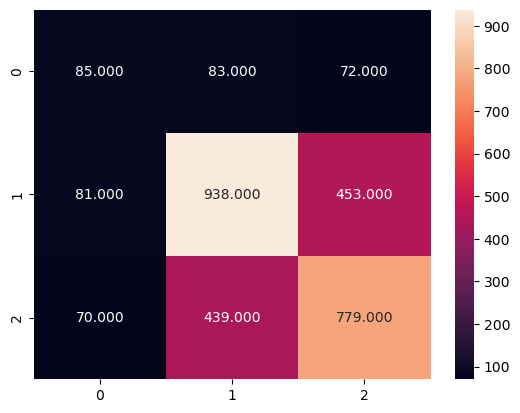

In [38]:
sns.heatmap(cnc,annot=True,fmt='.3f')